# Autoencoders

<table align='left'>
<tr>
<td><img src='https://i.ytimg.com/vi/tGOjNzOQZek/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCL10j34y95vweDzRa5gDqhYnfSiA' width='700'/> </td>
</tr>
</table>

# AE Básico

## Datos

In [54]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)

path = "/content/drive/My Drive/Data/"

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


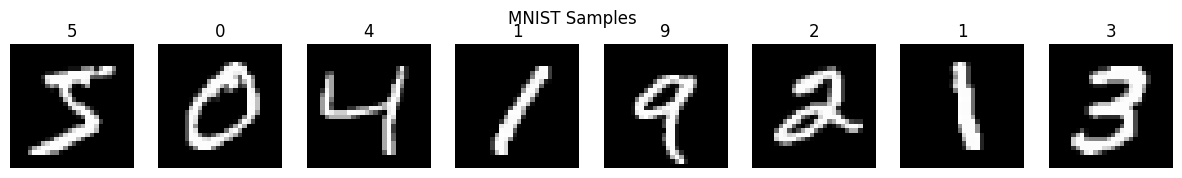

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n = 8
plt.figure(figsize=(15, 2))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'{y_train[i]}')
    plt.axis('off')
plt.suptitle('MNIST Samples')
plt.show()

In [2]:
# Ejecutar solo 1 vez
x_train = x_train.reshape(len(x_train), 28*28).astype('float32') / 255.
x_test = x_test.reshape(len(x_test), 28*28).astype('float32') / 255.
n_inputs = 784

## Modelo

In [15]:
# Encoder
visible = Input(shape=(n_inputs,))
e = Dense(512)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
e = Dense(256)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

n_bottleneck = 64
bottleneck = Dense(n_bottleneck)(e)

encoder = Model(inputs=visible, outputs=bottleneck)

# Decoder
d = Dense(256)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
d = Dense(512)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
output = Dense(n_inputs, activation='sigmoid')(d)

decoder = Model(inputs=bottleneck, outputs=output)
autoencoder = Model(inputs=visible, outputs=output)
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,106,256 (4.22 MB)

 Trainable params: 1,103,184 (4.21 MB)

 Non-trainable params: 3,072 (12.00 KB)

## Plot Encoder

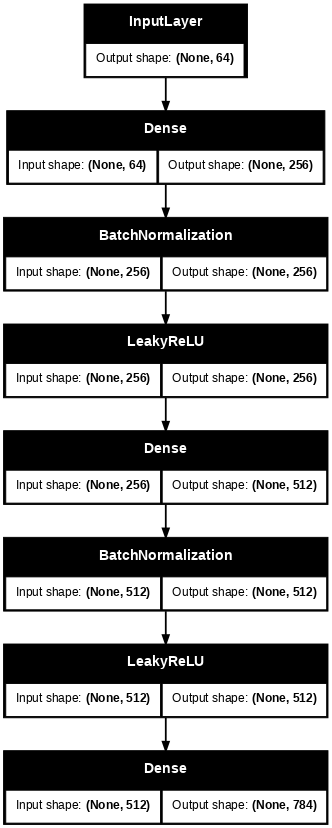

In [20]:
plot_model(encoder, 'encoder_mnist.png',
           show_shapes=True,
           show_layer_names=False,
           dpi=64,  # Lower DPI = smaller image
           expand_nested=False)

## Plot Decoder

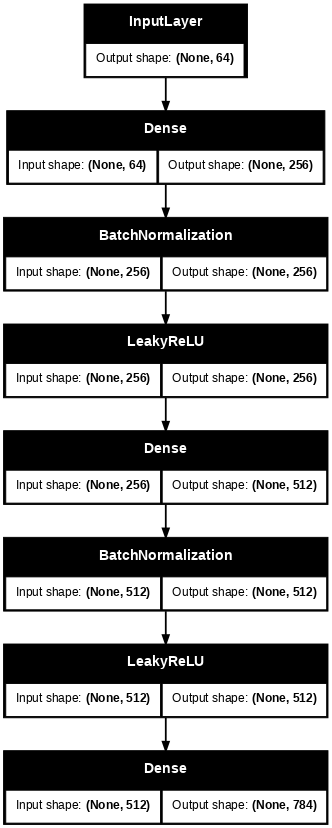

In [23]:
plot_model(decoder, 'encoder_mnist.png',
           show_shapes=True,
           show_layer_names=False,
           dpi=64,  # Lower DPI = smaller image
           expand_nested=False)

## Train

In [4]:
print(x_train.shape)

(60000, 784)


In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
history = autoencoder.fit(x_train, x_train,
                         epochs=40,
                         batch_size=256,
                         verbose=2,
                         validation_data=(x_test, x_test))


Epoch 1/40
235/235 - 7s - 30ms/step - loss: 0.1381 - val_loss: 0.0943
Epoch 2/40
235/235 - 1s - 5ms/step - loss: 0.0836 - val_loss: 0.0795
Epoch 3/40
235/235 - 2s - 9ms/step - loss: 0.0785 - val_loss: 0.0762
Epoch 4/40
235/235 - 1s - 5ms/step - loss: 0.0762 - val_loss: 0.0749
Epoch 5/40
235/235 - 1s - 5ms/step - loss: 0.0748 - val_loss: 0.0740
Epoch 6/40
235/235 - 1s - 4ms/step - loss: 0.0739 - val_loss: 0.0729
Epoch 7/40
235/235 - 1s - 4ms/step - loss: 0.0732 - val_loss: 0.0722
Epoch 8/40
235/235 - 1s - 4ms/step - loss: 0.0726 - val_loss: 0.0718
Epoch 9/40
235/235 - 1s - 4ms/step - loss: 0.0722 - val_loss: 0.0718
Epoch 10/40
235/235 - 1s - 4ms/step - loss: 0.0719 - val_loss: 0.0713
Epoch 11/40
235/235 - 2s - 9ms/step - loss: 0.0716 - val_loss: 0.0709
Epoch 12/40
235/235 - 1s - 6ms/step - loss: 0.0714 - val_loss: 0.0709
Epoch 13/40
235/235 - 2s - 9ms/step - loss: 0.0711 - val_loss: 0.0708
Epoch 14/40
235/235 - 1s - 4ms/step - loss: 0.0709 - val_loss: 0.0709
Epoch 15/40
235/235 - 1s - 4

In [18]:
encoder.save('encoder.keras')
decoder.save('decoder.keras')
autoencoder.save('autoencoder.keras')

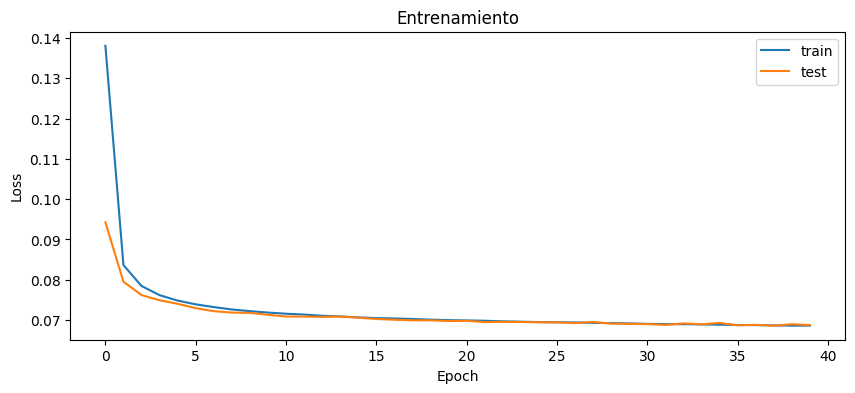

In [19]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Entrenamiento')
plt.legend()
plt.show()

## Aplicación a Reconstrucción

In [ ]:
pythonfrom tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(len(x_test), 28*28).astype('float32') / 255.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


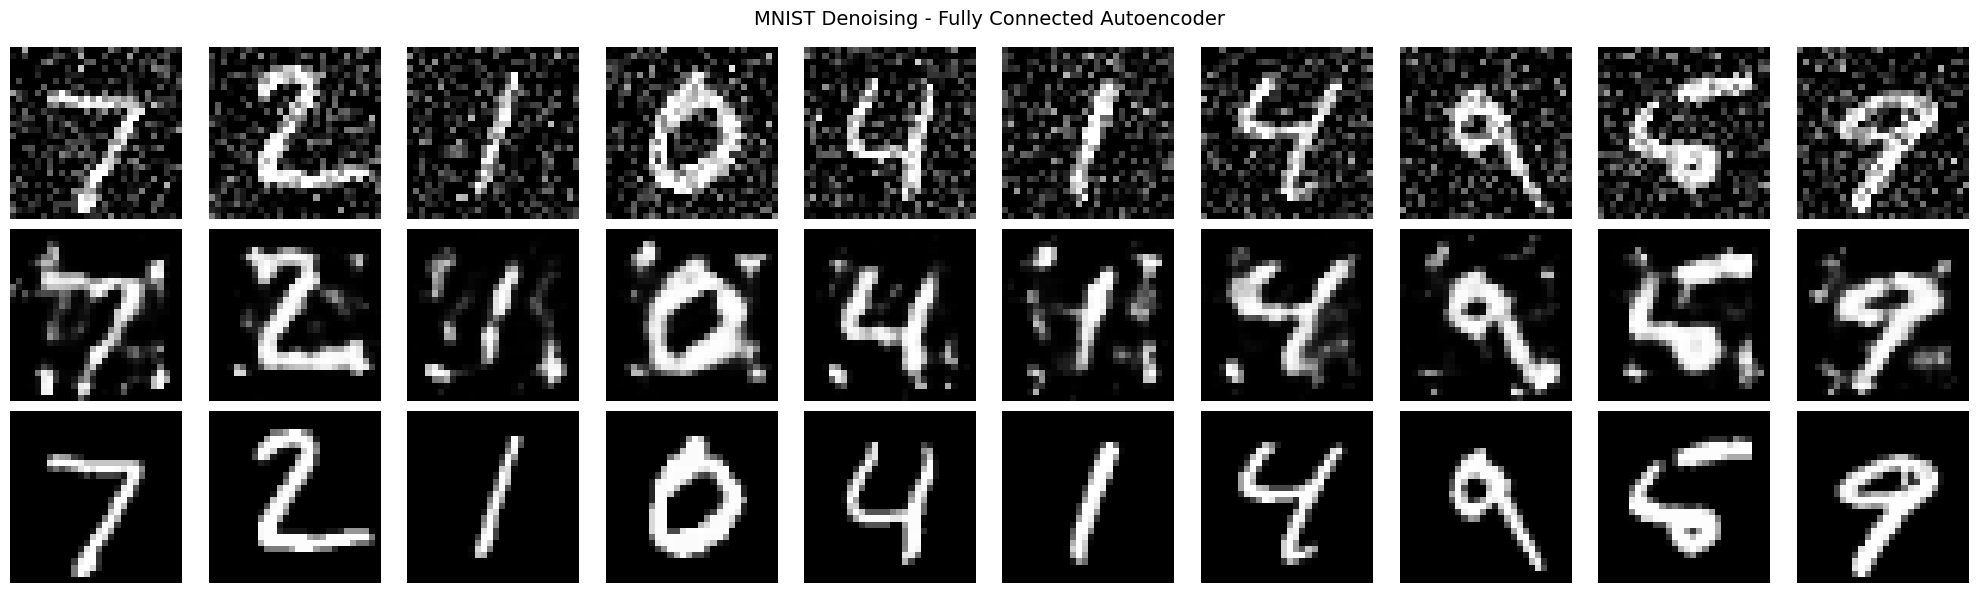

In [23]:
from tensorflow.keras.models import load_model
autoencoder = load_model('autoencoder.keras')

# Add noise to test images
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reconstruct from noisy images
decoded_noisy = autoencoder.predict(x_test_noisy)

# Visualize: Noisy -> Reconstructed -> Original
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel('Noisy', fontsize=12)
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_noisy[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel('Reconstructed', fontsize=12)
    plt.axis('off')

    # Original
    plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel('Original', fontsize=12)
    plt.axis('off')

plt.suptitle('MNIST Denoising - Fully Connected Autoencoder', fontsize=14)
plt.tight_layout()

## Aplicación a Novelty Detection

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


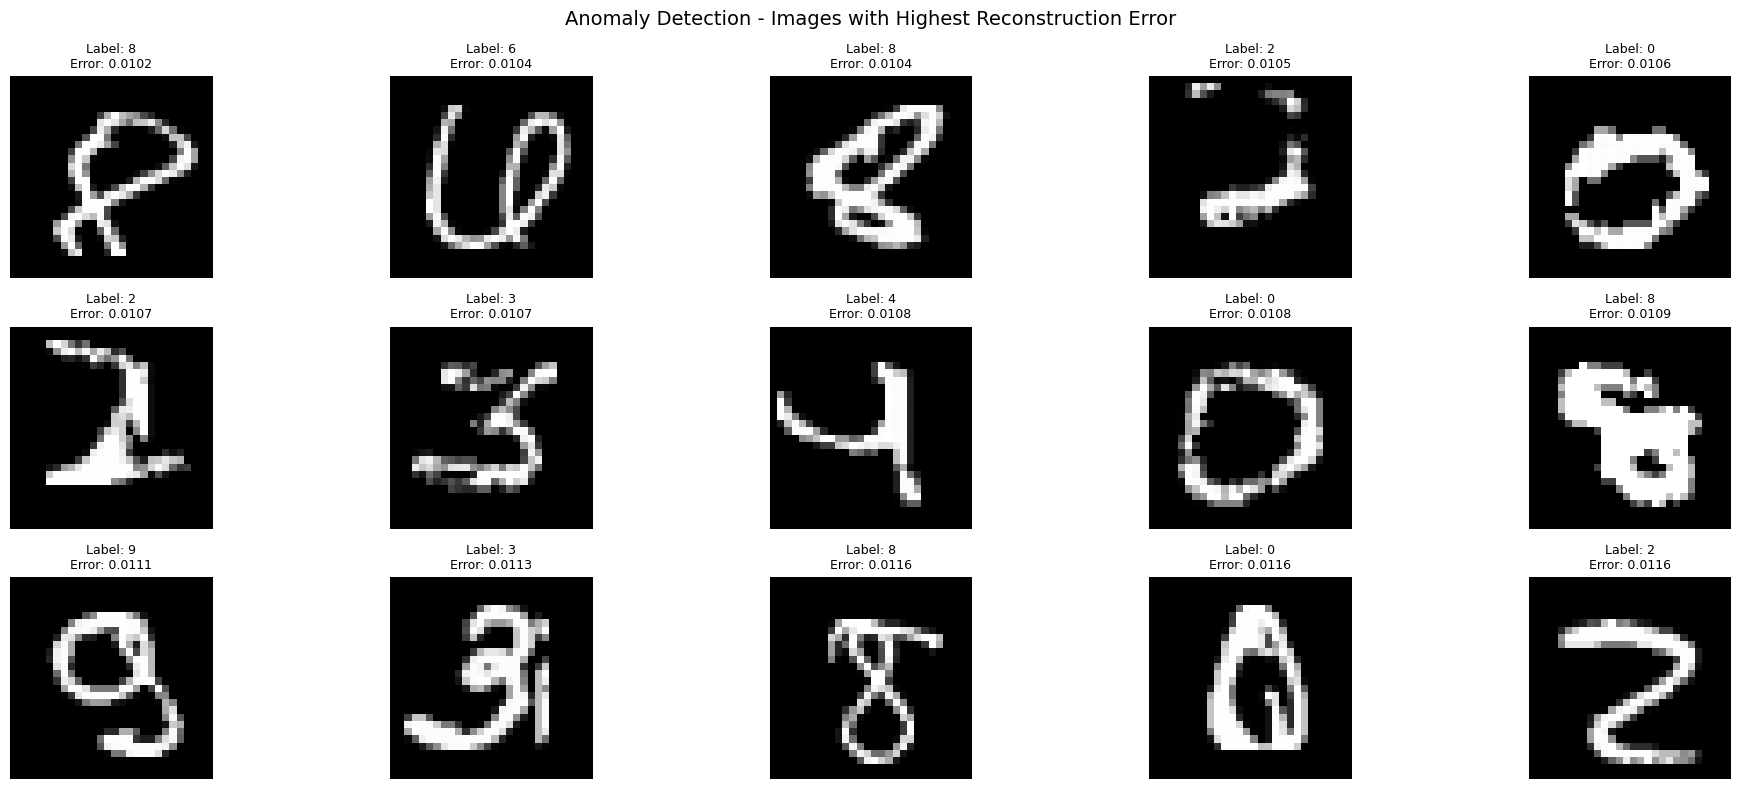

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(len(x_test), 28*28).astype('float32') / 255.

# Load trained model
autoencoder = load_model('autoencoder.keras')

# Reconstruct test images
decoded = autoencoder.predict(x_test)

# Calculate reconstruction error for each image
reconstruction_error = np.mean(np.square(x_test - decoded), axis=1)

# Find anomalies (highest reconstruction errors)
threshold = np.percentile(reconstruction_error, 95)
anomaly_indices = np.argsort(reconstruction_error)[-20:]  # Top 20 anomalies

# Visualize anomalies
plt.figure(figsize=(20, 8))
for idx, i in enumerate(anomaly_indices[:15]):
    # Original
    plt.subplot(3, 5, idx + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_test[i]}\nError: {reconstruction_error[i]:.4f}', fontsize=9)
    plt.axis('off')

plt.suptitle('Anomaly Detection - Images with Highest Reconstruction Error', fontsize=14)
plt.tight_layout()
plt.show()


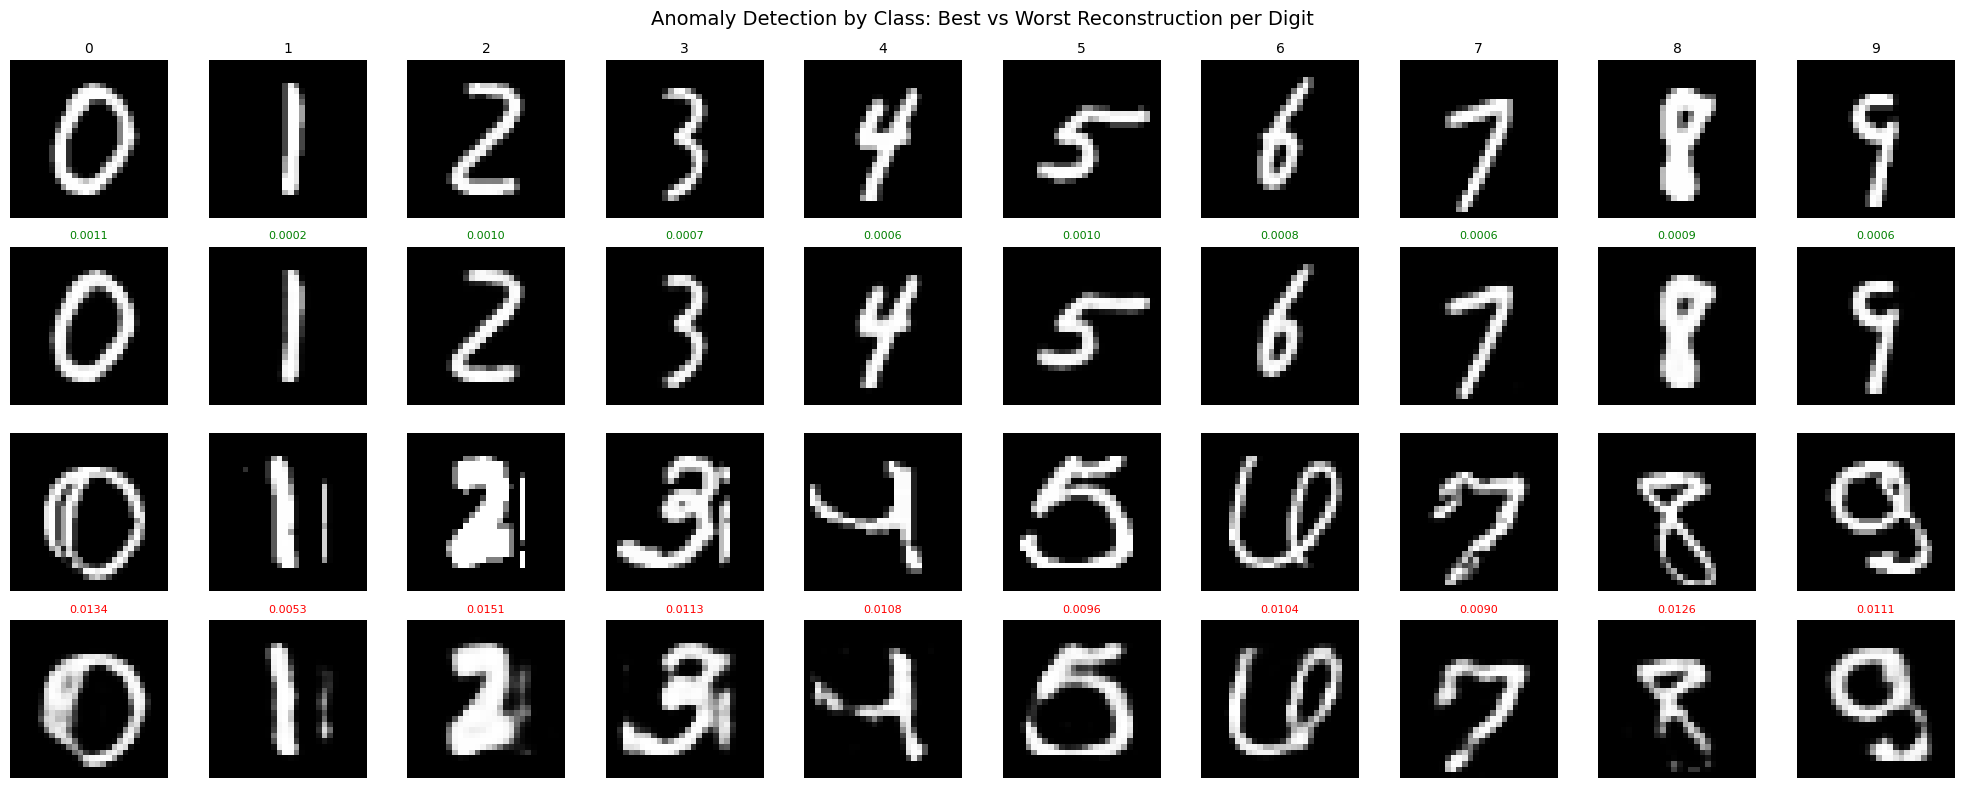

In [26]:
# Compare: Normal vs Anomaly by class
plt.figure(figsize=(20, 8))

for digit in range(10):
    # Find examples for this digit
    digit_indices = np.where(y_test == digit)[0]
    digit_errors = reconstruction_error[digit_indices]

    # Best (normal) and worst (anomaly) for this digit
    best_idx = digit_indices[np.argmin(digit_errors)]
    worst_idx = digit_indices[np.argmax(digit_errors)]

    # Normal (low error)
    plt.subplot(4, 10, digit + 1)
    plt.imshow(x_test[best_idx].reshape(28, 28), cmap='gray')
    if digit == 0:
        plt.ylabel('Normal\n(Original)', fontsize=10)
    plt.title(f'{digit}', fontsize=10)
    plt.axis('off')

    plt.subplot(4, 10, digit + 11)
    plt.imshow(decoded[best_idx].reshape(28, 28), cmap='gray')
    plt.title(f'{reconstruction_error[best_idx]:.4f}', fontsize=8, color='green')
    if digit == 0:
        plt.ylabel('Normal\n(Recon)', fontsize=10)
    plt.axis('off')

    # Anomaly (high error)
    plt.subplot(4, 10, digit + 21)
    plt.imshow(x_test[worst_idx].reshape(28, 28), cmap='gray')
    if digit == 0:
        plt.ylabel('Anomaly\n(Original)', fontsize=10)
    plt.axis('off')

    plt.subplot(4, 10, digit + 31)
    plt.imshow(decoded[worst_idx].reshape(28, 28), cmap='gray')
    plt.title(f'{reconstruction_error[worst_idx]:.4f}', fontsize=8, color='red')
    if digit == 0:
        plt.ylabel('Anomaly\n(Recon)', fontsize=10)
    plt.axis('off')

plt.suptitle('Anomaly Detection by Class: Best vs Worst Reconstruction per Digit', fontsize=14)
plt.tight_layout()
plt.show()

## Linear Probing

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), 28*28).astype('float32') / 255.
x_test = x_test.reshape(len(x_test), 28*28).astype('float32') / 255.


# Load the encoder
encoder = load_model('encoder.keras')

In [36]:
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train,
                                                        train_size=10000,
                                                        random_state=1,
                                                        stratify=y_train)

In [37]:
# Encode the data
x_train_encoded = encoder.predict(x_train_small)
x_test_encoded = encoder.predict(x_test)

# Train logistic regression on encoded features
model = LogisticRegression(max_iter=1000)
model.fit(x_train_encoded, y_train_small)

# Evaluate
yhat = model.predict(x_test_encoded)
acc = accuracy_score(y_test, yhat)

print(f"Accuracy with pre-trained encoder: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy with pre-trained encoder: 0.9068


## Sin Pre-entrenamiento

In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_small, y_train_small)

# Evaluate
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)

print(f"Accuracy sin pre-entrenamiento (raw pixels): {acc:.4f}")

Accuracy sin pre-entrenamiento (raw pixels): 0.9089


# AE Convolucional

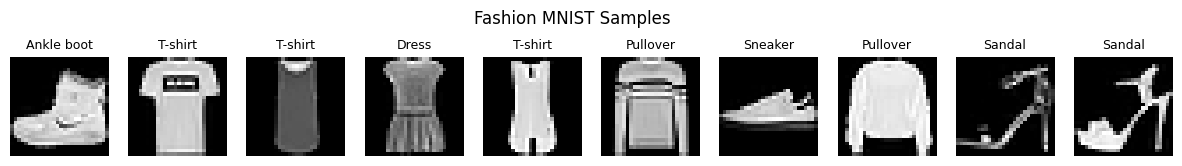

In [45]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some samples
n = 10
plt.figure(figsize=(15, 2))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=9)
    plt.axis('off')
plt.suptitle('Fashion MNIST Samples')
plt.show()


In [48]:
from tensorflow import keras
from tensorflow.keras import layers

# Encoder
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(input_img, encoded)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

autoencoder.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.4150 - val_loss: 0.3028
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2988 - val_loss: 0.2947
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2914 - val_loss: 0.2910
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2885 - val_loss: 0.2883
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2862 - val_loss: 0.2865
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2840 - val_loss: 0.2853
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2827 - val_loss: 0.2839
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2811 - val_loss: 0.2834
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2810 - val_loss: 0.2822
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2800 - val_loss: 0.2816
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2800 - val_loss: 0.2809
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

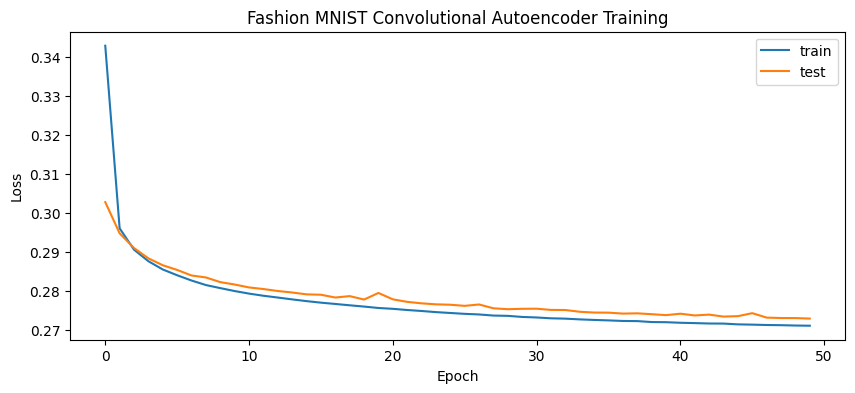

In [50]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Fashion MNIST Convolutional Autoencoder Training')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


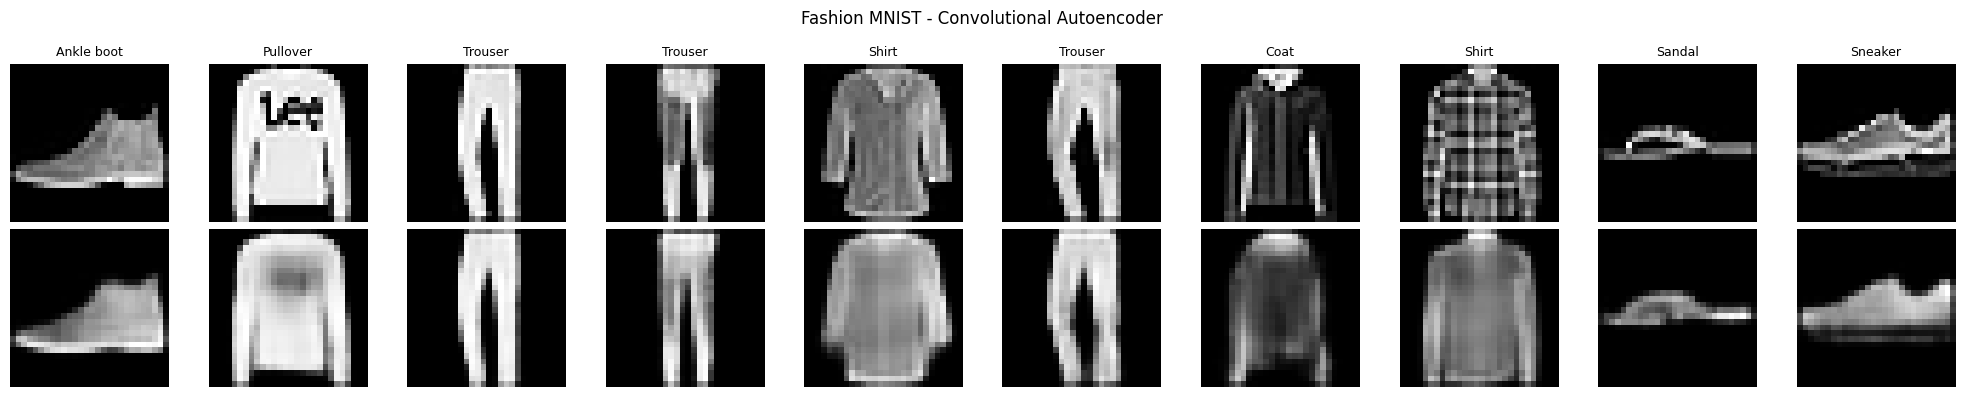

In [51]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_test[i]], fontsize=9)
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Fashion MNIST - Convolutional Autoencoder')
plt.tight_layout()
plt.show()

In [55]:
encoder.save('encoder_fashion.keras')
autoencoder.save('autoencoder_fashion.keras')

In [56]:
!cp encoder_fashion.keras '/content/drive/MyDrive/'
!cp autoencoder_fashion.keras '/content/drive/MyDrive/'


## Linear Probing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

# Use small subset for training
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train,
                                                        train_size=5000,
                                                        random_state=1,
                                                        stratify=y_train)

In [64]:
!cp '/content/drive/MyDrive/encoder_fashion.keras' .
!cp '/content/drive/MyDrive/autoencoder_fashion.keras' .

In [65]:
# Load encoder and encode data
encoder = load_model('encoder_fashion.keras')
x_train_encoded = encoder.predict(x_train_small)
x_test_encoded = encoder.predict(x_test)

# Flatten encoded representations
x_train_encoded = x_train_encoded.reshape(len(x_train_encoded), -1)
x_test_encoded = x_test_encoded.reshape(len(x_test_encoded), -1)

# Train logistic regression on encoded features
model = LogisticRegression(max_iter=1000)
model.fit(x_train_encoded, y_train_small)

# Evaluate
yhat = model.predict(x_test_encoded)
acc = accuracy_score(y_test, yhat)

print(f"Accuracy with pre-trained encoder: {acc:.4f}")
print(f"Encoded shape: {x_train_encoded.shape}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy with pre-trained encoder: 0.8533
Encoded shape: (5000, 128)


## Clasificador sin Pre-entrenamiento

In [67]:
# Flatten images
x_train_flat = x_train_small.reshape(len(x_train_small), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

print(x_train_flat.shape)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_flat, y_train_small)  # Usa x_train_flat invece di x_train_small

# Evaluate
yhat = model.predict(x_test_flat)
acc = accuracy_score(y_test, yhat)

print(f"Accuracy without pre-training (raw pixels): {acc:.4f}")
print(f"Raw pixel shape: {x_train_flat.shape}")

(5000, 784)
Accuracy without pre-training (raw pixels): 0.8217
Raw pixel shape: (5000, 784)
